In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('customer_data_edited.csv')

print(str(data.shape) + '\n')

data.head()

(12892, 22)



,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


In [61]:
#Eliminamos columna de ID
data.drop(['recordID', 'customer_id'], axis = 1, inplace=True)
print(str(data.shape) + '\n')

(12892, 20)



### 2. Análisis de Datos para toma de decisiones en Feature Engineering Pipeline

#### 2.1 Análisis del target

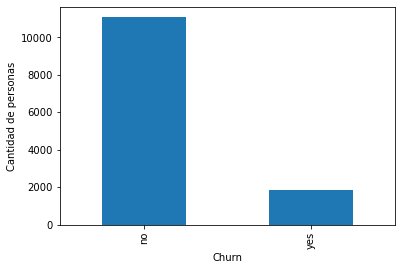

In [62]:
data['churn'].value_counts().plot(kind="bar")
plt.xlabel('Churn')
plt.ylabel('Cantidad de personas')
plt.show()

* La data está desbalanceada. Se procederá a hacer un balanceo.

### 2.3. Verificamos tipos de variables en X

#### 2.3.1 Variables categóricas

In [63]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

#Agregamos el caso especial de MSSubClass ya que por definición es categórica
cat_vars = cat_vars + ['area_code']

In [64]:
#Cantidad de variables categóricas
len(cat_vars)

5

In [65]:
data[cat_vars] = data[cat_vars].astype('O')

In [66]:
data[cat_vars] = data[cat_vars]

In [67]:
data[cat_vars].dtypes

state                 object
international_plan    object
voice_mail_plan       object
churn                 object
area_code             object
dtype: object

#### 2.3.2. Variables numéricas

In [68]:
#Variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars)]

In [69]:
data[num_vars].dtypes

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [70]:
len(num_vars)

15

### 2.4 Análisis de valores faltantes

In [71]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

0

* No hay valores faltantes

### 2.5 Variables Discretas

In [72]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['number_customer_service_calls']

In [73]:
print('Cantidad de Variables Discretas: ', len(discrete_vars))

Cantidad de Variables Discretas:  1


In [74]:
data[discrete_vars].head()

,number_customer_service_calls
0,3
1,0
2,1
3,1
4,2


In [75]:
import seaborn as sns

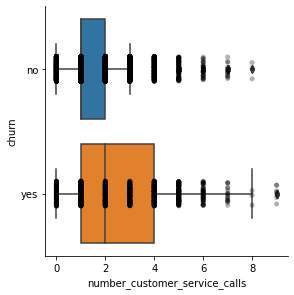

In [76]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'churn', data=data, kind = "box", height=4)
    sns.stripplot(x=var, y='churn', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## 2.6 Variables continuas

In [77]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

In [78]:
print('Variables Numéricas Continuas: ', len(cont_vars))

Variables Numéricas Continuas:  14


In [79]:
data[cont_vars].head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57
2,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70
3,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24
4,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08


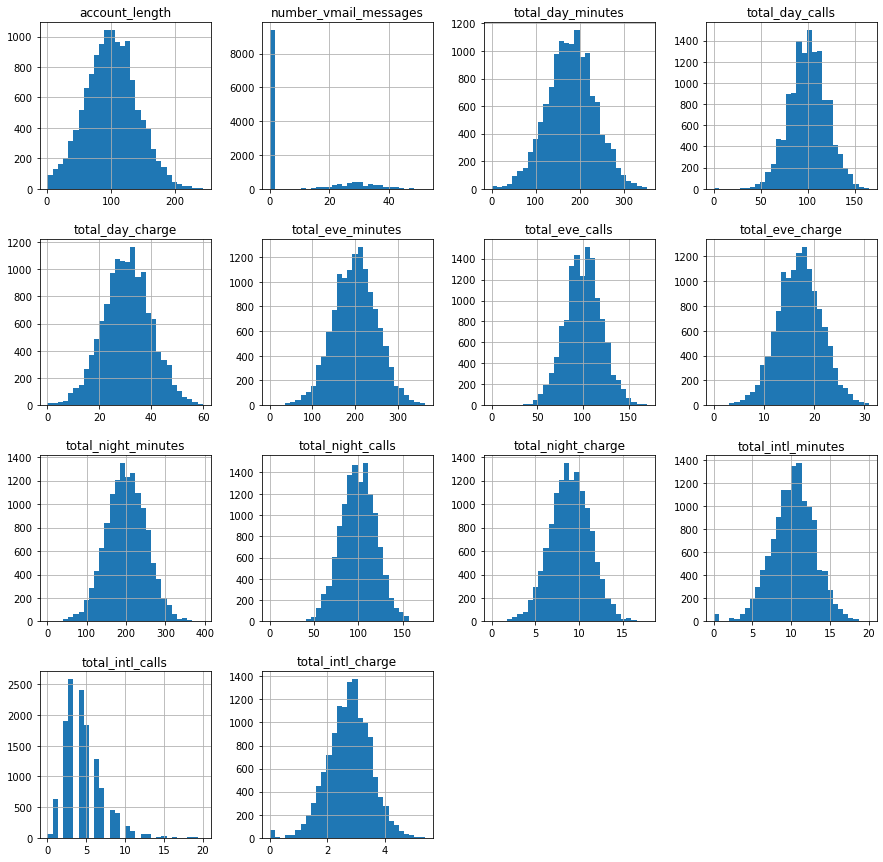

In [80]:
data[cont_vars].hist(bins=30, figsize =(15, 15))
plt.show()

- Las mayoría de las variables poseen una dist. normal.

In [81]:
sesgadas = ['number_vmail_messages']

In [82]:
cont_vars = [var for var in cont_vars if var not in sesgadas]
cont_vars

['account_length',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge']

#### Transformación de Yeo-Johnson

In [83]:
import scipy.stats as stats

In [84]:
temp_yj = data.copy()

In [85]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

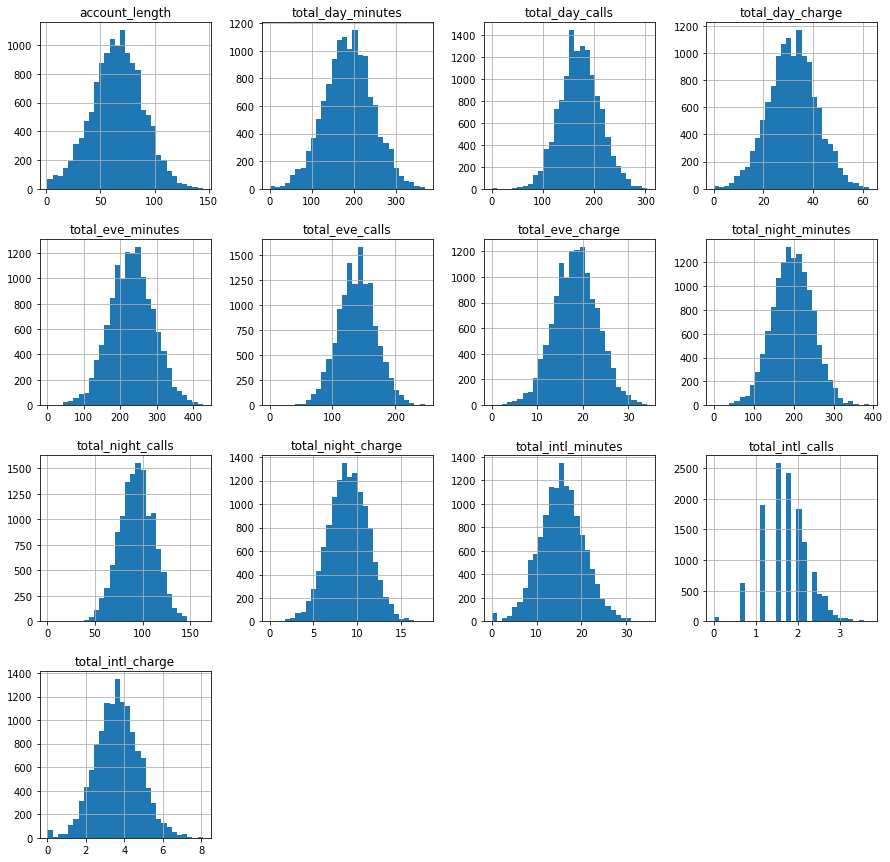

In [86]:
temp_yj[cont_vars].hist(bins=30, figsize =(15, 15))
plt.show()

- Considero que no hace falta aplicar esta transformación. NO obstante sí que ayudó a _total\_intl\_calls_

In [87]:
len(cont_vars)

13

In [89]:
cont_specials = ['total_intl_calls']

In [92]:
temp = data.copy()

for var in cont_vars:
    temp[var] = np.log(data[var] + 0.1)

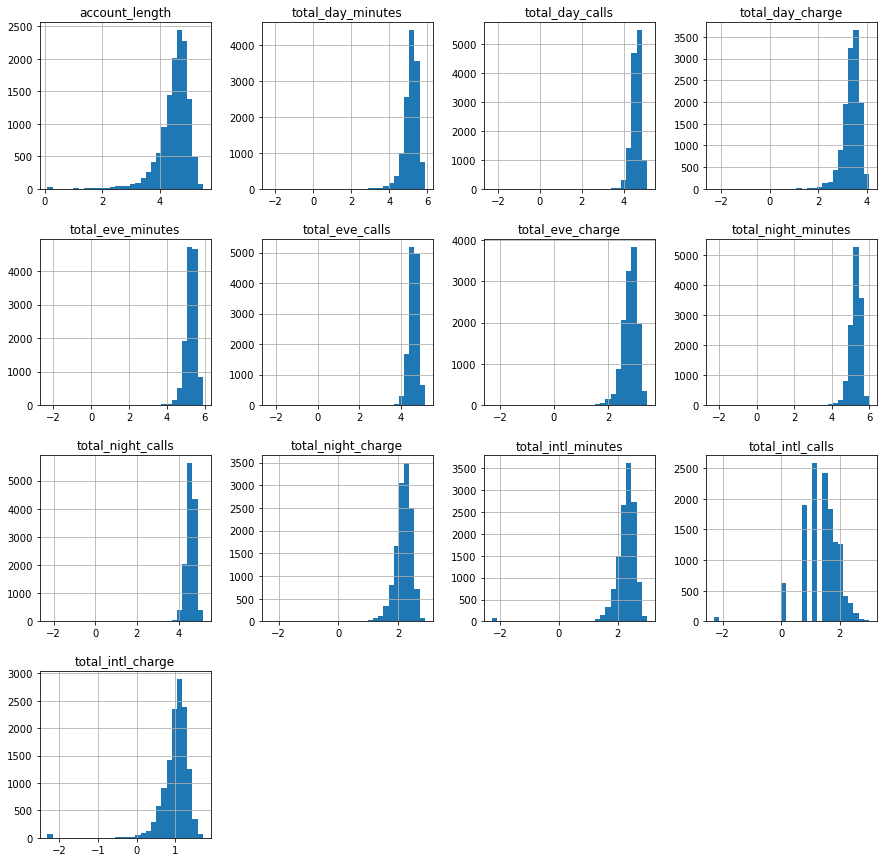

In [93]:
temp[cont_vars].hist(bins=30, figsize =(15, 15))
plt.show()

- Evidentemente esta transformación no fue de mucha utilidad.

- Por el tipo de datos, considero que no es necesario realizar el análisis de Scatter Plot.

## 2.7 Variables Categóricas

In [98]:
data[cat_vars].head()

,state,international_plan,voice_mail_plan,churn,area_code
0,HI,no,no,no,510
1,MT,no,no,no,510
2,OH,no,yes,no,408
3,NM,no,no,no,415
4,SC,no,no,no,415


<AxesSubplot:>

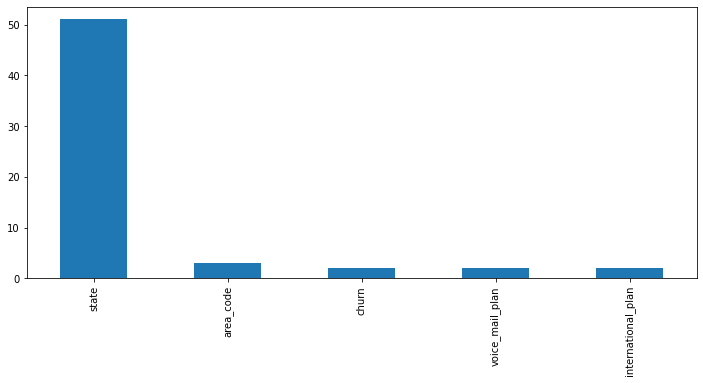

In [99]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [100]:
np.unique(data['area_code'])

array([408, 415, 510], dtype=object)

In [102]:
np.unique(data['voice_mail_plan'])

array(['no', 'yes'], dtype=object)

In [106]:
np.unique(data['international_plan'])

array(['no', 'yes'], dtype=object)

- El dataset carece de variables categóricas ordinales

## 2.7 Rare labels

In [116]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['churn'].count()/len(df)
    
    return temp[temp < rare_perc]

In [120]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: churn, dtype: float64)

Series([], Name: churn, dtype: float64)

Series([], Name: churn, dtype: float64)

Series([], Name: churn, dtype: float64)

Series([], Name: churn, dtype: float64)



- Si colocamos un threshold del 1%, no existen variables "atípicas"